# Predict Outbursts for Sources without Established Periods
- for now, just those with strong signals/phase-folds since also extrapolating for several months

In [114]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sb
import scipy.stats as st
import wotan

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

In [2]:
cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
summ = pd.read_csv('summtab.csv')

In [199]:
def find_next(iband,pd,peak,today=9235):
    '''Find next outburst given period and peak in phase'''
    #calculate phase today
    pt = (today%pd)/pd
    print(f'phase today: {pt}')
    #difference between peak and phase today
    if pt>peak: #if current phase less than 1 but more than peak
        diff = 1-(pt) + peak
    else: #before peak in phase
        diff = peak - pt
    print(f'phase until peak: {diff}')
    #calculate difference in days
    dd = diff*pd
    print(f'days until peak: {dd}')
    return dd

# Source #64
- young: SNR
- doesn't have established period but there is published A & A paper with 26.2 day period (Carpano et al. 2017)

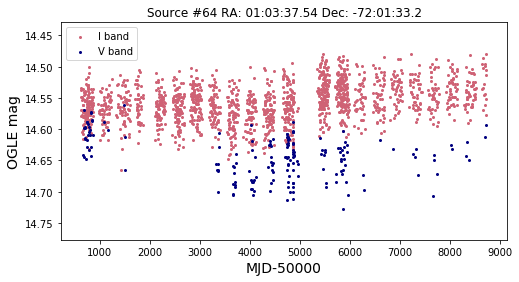

In [183]:
iband,vband = o.getIV(64,cross,stack=True,plot=True)

In [184]:
o.splinedetrend(iband,window=100)

26.17077112072268


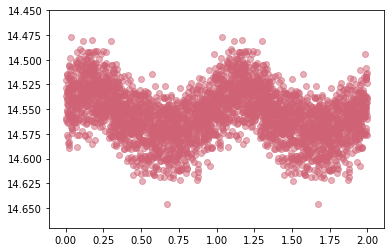

In [185]:
#phase-fold with best period
bp = o.periodogram(iband,minp=5,maxp=200,plot=False)
# bp = 26.188 #Carpano period
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.ylim(14.67,14.45)
print(bp)

confirm that source goes into outbursts at all, and if they coincide with optical peaks

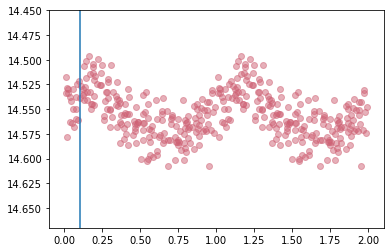

In [187]:
#recent fold
st = -200
end = -1
plt.scatter((iband['MJD-50000'][st:end]%bp)/bp,iband['I detrend'][st:end],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000'][st:end]%bp)/bp,iband['I detrend'][st:end],color=pink,alpha=0.5)
plt.ylim(14.67,14.45)
plt.axvline(0.1)

In [203]:
def recent_fold(iband,bp,st=-200,end=-1,ylim=.01):
    rec = iband[st:end]
    plt.scatter((rec['MJD-50000']%bp)/bp,rec['I detrend'],color=pink,alpha=0.5)
    plt.scatter(1+(rec['MJD-50000']%bp)/bp,rec['I detrend'],color=pink,alpha=0.5)
    maxi,mini = np.max(rec['I detrend']),np.min(rec['I detrend'])
    plt.ylim(maxi+ylim,mini-ylim)

In [188]:
#didn't go quite to peak
find_next(iband,bp,0.1)

phase today: 0.8745850628563583
phase until peak: 0.22541493714364172
days until peak: 5.899282727178337


<Quantity 5.89928273>

# Source 34
- spin period 152 seconds
- best period nearly = to double a mentioned alias of NRP 1.026 days
- below: not seeing NRP and alias isn't sinusoidal


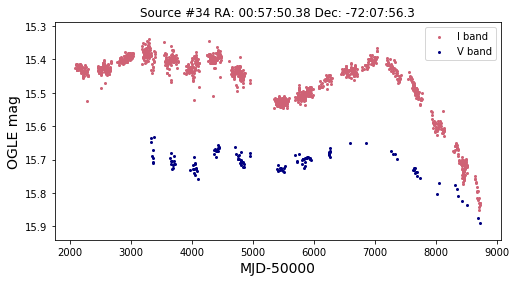

In [204]:
iband,vband = o.getIV(34,cross,stack=True,plot=True)
o.splinedetrend(iband,window=100)

72.49150338679206


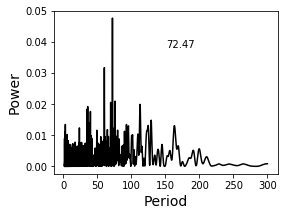

In [205]:
o.periodogram(iband,minp=2,maxp=300,det=True)
bp = o.periodogram(iband,minp=2,maxp=100,det=True,plot=False)
print(bp)

72.49150338679206


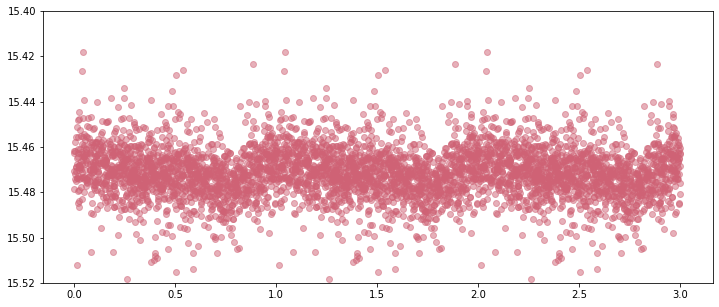

In [206]:
#phase-fold with best period (showing up to phase 3)
# bp=72.49
plt.figure(figsize=(12,5))
plt.scatter((iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)
plt.scatter(2+(iband['MJD-50000']%bp)/bp,iband['I detrend'],color=pink,alpha=0.5)

plt.ylim(15.52,15.4)
print(bp)
#fast rise, peak around phase 0
# plt.axvline(0.96)

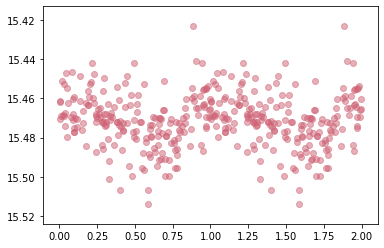

In [207]:
#confirm that same phase recently -- yes still at 0
recent_fold(iband,bp,st=-200,end=-1,ylim=.01)

In [193]:
find_next(iband,bp,0)

phase today: 0.3942402701309588
phase until peak: 0.6057597298690411
days until peak: 43.91243350938384


<Quantity 43.91243351>

1.026


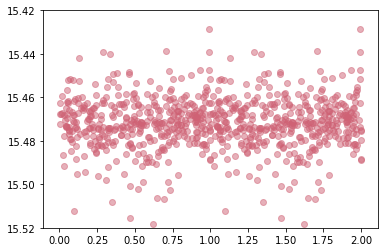

In [105]:
#not really seeing NRP
st = 0
end = 400
bp = 1.026
plt.scatter((iband['MJD-50000'][st:end]%bp)/bp,iband['I detrend'][st:end],color=pink,alpha=0.5)
plt.scatter(1+(iband['MJD-50000'][st:end]%bp)/bp,iband['I detrend'][st:end],color=pink,alpha=0.5)
plt.ylim(15.52,15.42)
print(bp)
#fast rise, peak around phase 0
# plt.axvline(0.96)

# Source #35

established period: nan


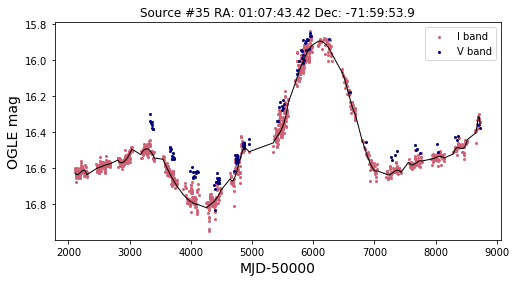

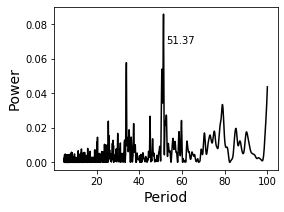

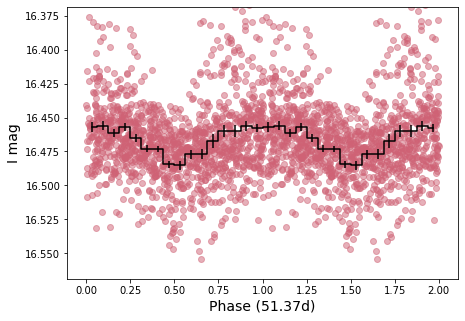

In [208]:
reload(o)
iband,vband,bp = o.splinesearch(35,cross,full,minp=5,maxp=100,window=300,btol=100,color=pink,ylim=.1)

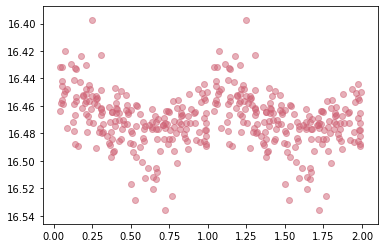

In [209]:
recent_fold(iband,bp,st=-200,end=-1,ylim=.01)

In [195]:
find_next(iband,bp,0)

phase today: 0.7795758601265955
phase until peak: 0.22042413987340448
days until peak: 11.322848671723731


<Quantity 11.32284867>

# Source #38

established period: nan


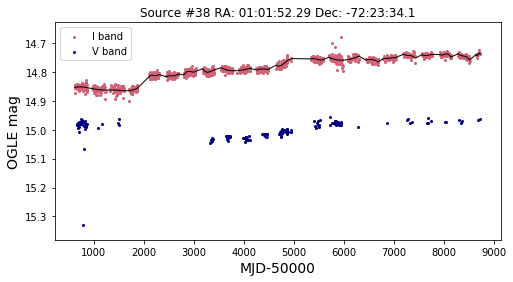

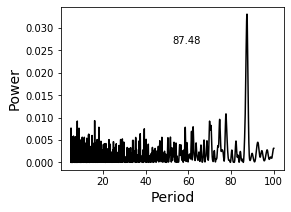

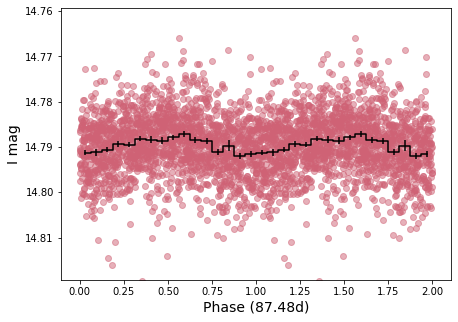

In [210]:
iband,vband,bp = o.splinesearch(38,cross,full,minp=5,maxp=100,window=300,btol=100,color=pink,ylim=.03)

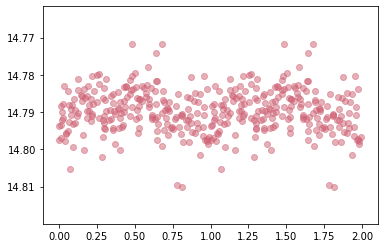

In [211]:
recent_fold(iband,bp,st=-200,end=-1,ylim=.01)

In [212]:
find_next(iband,bp,0.4)

phase today: 0.5658246510874121
phase until peak: 0.8341753489125879
days until peak: 72.97446283083998


<Quantity 72.97446283>

# Source #46 -- questionable

established period: nan


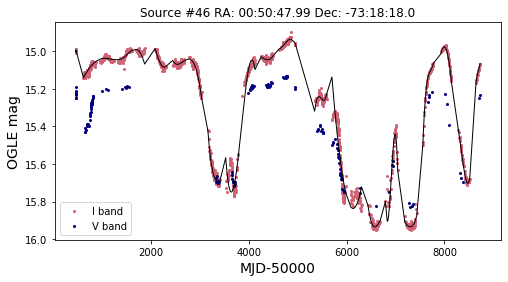

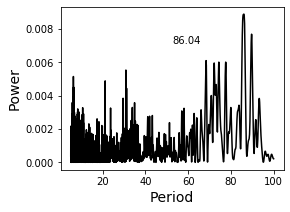

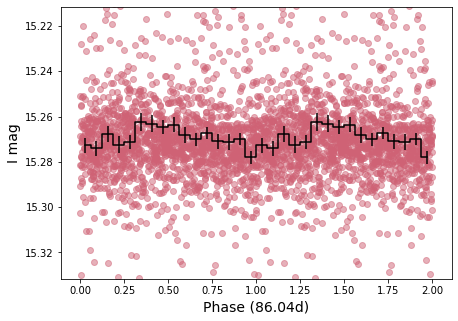

In [213]:
iband,vband,bp = o.splinesearch(46,cross,full,minp=5,maxp=100,window=300,btol=100,color=pink,ylim=.06)

(15.3, 15.24)

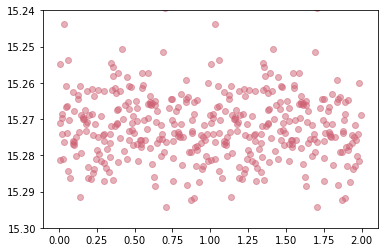

In [215]:
recent_fold(iband,bp,st=-200,end=-1,ylim=.01)
plt.ylim(15.3,15.24)

In [216]:
find_next(iband,bp,.4)#wouldn't really trust this one

phase today: 0.3295473297220827
phase until peak: 0.0704526702779173
days until peak: 6.061987832835957


<Quantity 6.06198783>

# Source #55

established period: nan


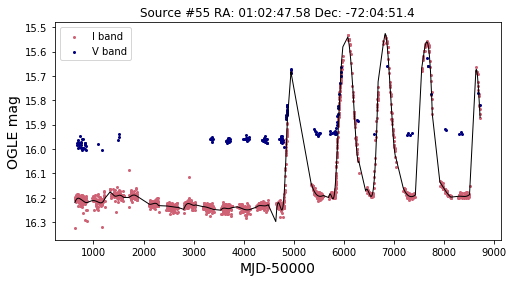

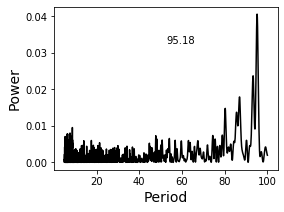

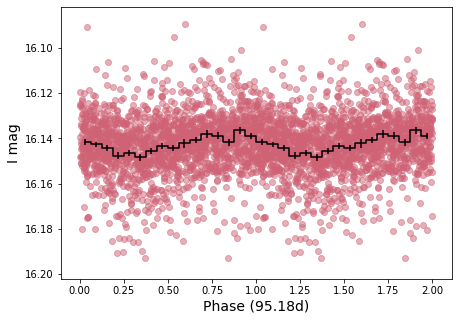

In [217]:
iband,vband,bp = o.splinesearch(55,cross,full,minp=5,maxp=100,window=100,btol=100,color=pink,ylim=.06)

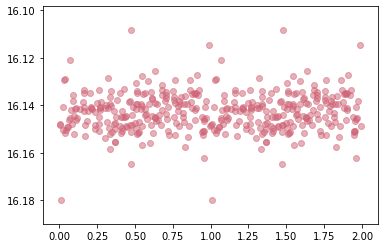

In [220]:
recent_fold(iband,bp,st=-200,end=-1,ylim=.01) #questionable

In [221]:
find_next(iband,bp,0.7)

phase today: 0.024598943429643094
phase until peak: 0.6754010565703569
days until peak: 64.28605555034483


<Quantity 64.28605555>

#### but want to observe larger trend

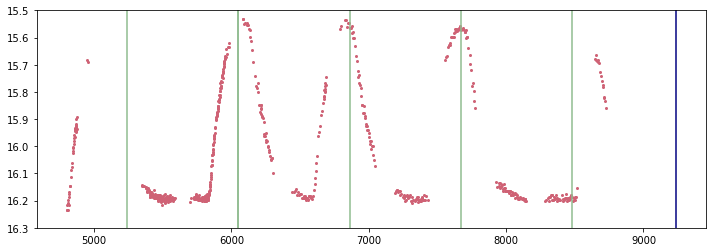

In [227]:
#repeat for larger trend
plt.figure(figsize=(12,4))
st = 1000
end = -1
plt.scatter(iband['MJD-50000'][st:end],iband['I mag'][st:end],color=pink,s=4)
plt.ylim(16.3,15.5)
plt.axvline(6050,color='darkseagreen')
for i in range(-1,4):
    plt.axvline(6050+810*i,color='darkseagreen')
#today
plt.axvline(9235,color='navy')

# (Source # 57)

In [148]:
# iband,vband,bp = o.splinesearch(57,cross,full,minp=5,maxp=100,window=100,btol=100,color=pink,ylim=.06)

# Source #63

established period: nan


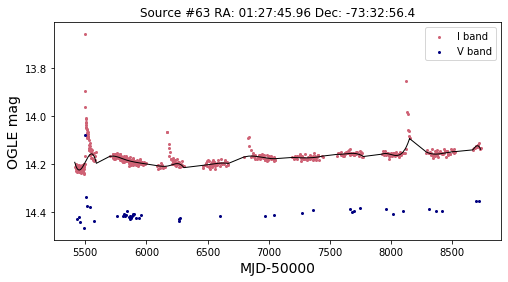

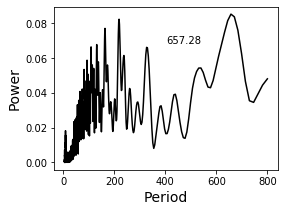

In [228]:
iband,vband,bp = o.splinesearch(63,cross,full,minp=5,maxp=800,window=100,btol=100,color=pink,ylim=.06,phase=False)

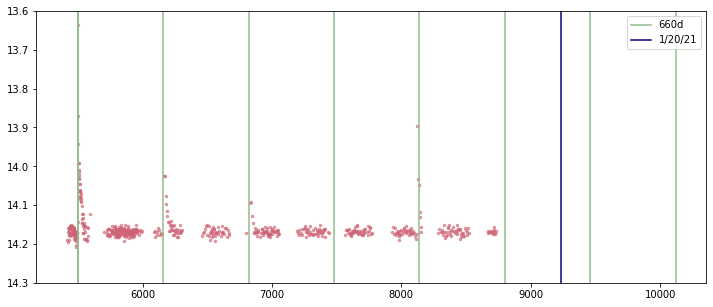

In [176]:
plt.figure(figsize=(12,5))
plt.scatter(iband['MJD-50000'],iband['I detrend'],color=pink,s=6,alpha=0.6)
plt.ylim(14.3,13.6)
plt.axvline(5500,color='darkseagreen',label='660d')
pd = 660
for i in range(int(4000/pd)+2):
    plt.axvline(5500+pd*i,color='darkseagreen')
plt.axvline(9234,color='navy',label='1/20/21')
plt.legend()

unless missed b/c of ampling, I think it's every ~660 days
- but periodogram has trouble picking it up


In [229]:
5500+660*6 #September (but should start end of August)

9460